1. Instalar Cartopy

In [ ]:
!pip install cartopy

2. Importar librerías

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pyproj import Proj
from datetime import datetime
import cartopy.feature as cfeature
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from scipy.interpolate import griddata


3. Cargar el dataset

In [ ]:
data=pd.read_csv('https://raw.githubusercontent.com/JJTorresDS/ds-data-sources/main/properati_venta_201501.csv')

4. Convertir a formato datetime la columna "created_on"

In [ ]:
data.created_on=pd.to_datetime(data.created_on)

5. Eliminar los datos ausentes

In [ ]:
data.dropna(inplace=True)

6. Crear las columnas "latitud" y "longitud" y llenarlas con los valores incluidos en la columna "lat_lon".

In [ ]:
data['latitud'], data['longitud'] = np.nan, np.nan
for i in range(len(data)):
  data.latitud.iloc[i]=float(data.lat_lon.iloc[i].split(',')[0])
  data.longitud.iloc[i]=float(data.lat_lon.iloc[i].split(',')[1])


7. Crear una columna "provincia" igual a la columna "state_name" y luego reemplazar las categorías 'Bs.As. G.B.A. Zona Norte','Buenos Aires Costa Atlántica','Bs.As. G.B.A. Zona Oeste','Bs.As. G.B.A. Zona Sur','Buenos Aires Interior' por "Buenos Aires"

In [ ]:
data.state_name.value_counts()

Capital Federal                 1904
Bs.As. G.B.A. Zona Norte        1284
Buenos Aires Costa Atlántica    1201
Bs.As. G.B.A. Zona Oeste         846
Bs.As. G.B.A. Zona Sur           244
Buenos Aires Interior            208
Santa Fe                         143
Córdoba                          112
Misiones                          27
La Pampa                          15
San Luis                          12
Neuquén                            6
Tucumán                            5
Mendoza                            5
Salta                              5
Entre Ríos                         4
Jujuy                              3
Río Negro                          2
Chaco                              2
Santa Cruz                         2
San Juan                           1
La Rioja                           1
Name: state_name, dtype: int64

In [ ]:
data['provincia']=data['state_name']
data['provincia'][data['state_name'].isin(['Bs.As. G.B.A. Zona Norte','Buenos Aires Costa Atlántica','Bs.As. G.B.A. Zona Oeste','Bs.As. G.B.A. Zona Sur','Buenos Aires Interior'])]='Buenos Aires'

In [ ]:
data.provincia.value_counts()

Buenos Aires       3783
Capital Federal    1904
Santa Fe            143
Córdoba             112
Misiones             27
La Pampa             15
San Luis             12
Neuquén               6
Salta                 5
Mendoza               5
Tucumán               5
Entre Ríos            4
Jujuy                 3
Santa Cruz            2
Chaco                 2
Río Negro             2
San Juan              1
La Rioja              1
Name: provincia, dtype: int64

8. Detectar outliers en las columnas "surface_total_in_m2", "surface_covered_in_m2" y "price_usd_per_m2" a partir del gráfico de Seaborn: pairplot.

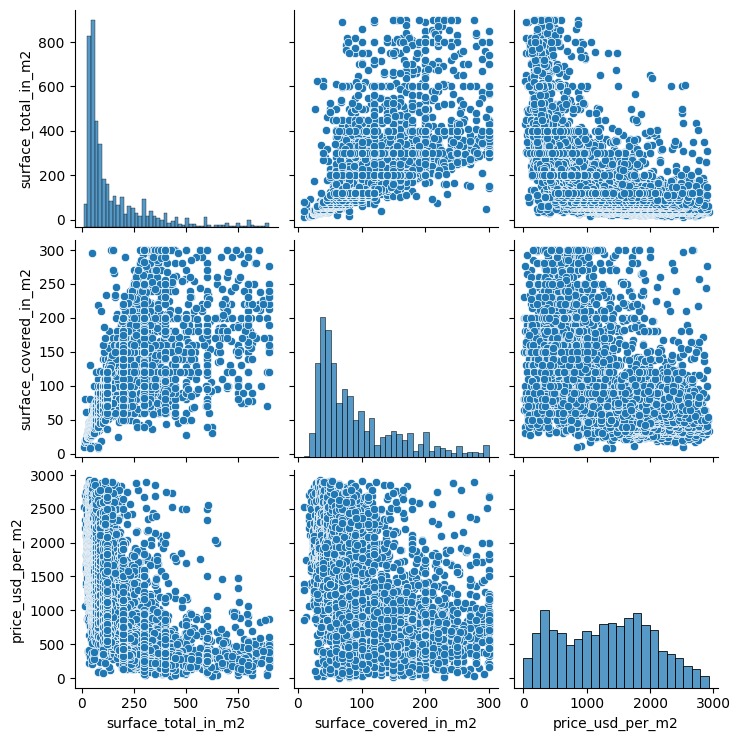

In [ ]:
sns.pairplot(data[["surface_total_in_m2", "surface_covered_in_m2" ,"price_usd_per_m2"]])

9. Eliminar outliers según lo consideren necesario y volver a realizar el pairplot. ¿Qué fenómeno se puede observar fácilmente en la forma de medir los datos "surface_total_in_m2"?

In [ ]:
data.price_usd_per_m2[data.price_usd_per_m2>np.percentile(data.price_usd_per_m2,95)]=np.nan
data.surface_total_in_m2[data.surface_total_in_m2>np.percentile(data.surface_total_in_m2,95)]=np.nan
data.surface_covered_in_m2[data.surface_covered_in_m2>np.percentile(data.surface_covered_in_m2,95)]=np.nan


<ipython-input-86-2dfea0f95edd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.price_usd_per_m2[data.price_usd_per_m2>np.percentile(data.price_usd_per_m2,95)]=np.nan
<ipython-input-86-2dfea0f95edd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.surface_total_in_m2[data.surface_total_in_m2>np.percentile(data.surface_total_in_m2,95)]=np.nan
<ipython-input-86-2dfea0f95edd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dat

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5972 entries, 0 to 18888
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     5972 non-null   object        
 1   created_on             5972 non-null   datetime64[ns]
 2   operation              5972 non-null   object        
 3   property_type          5972 non-null   object        
 4   country_name           5972 non-null   object        
 5   state_name             5972 non-null   object        
 6   lat_lon                5972 non-null   object        
 7   surface_total_in_m2    5972 non-null   float64       
 8   surface_covered_in_m2  5972 non-null   float64       
 9   price_usd_per_m2       5972 non-null   float64       
 10  latitud                5972 non-null   float64       
 11  longitud               5972 non-null   float64       
 12  provincia              5972 non-null   object        
dtypes:

10. Realizar un gráfico que permita ver la distribución de precios en cada provincia. ¿Qué provincia tiene los mayores precios?


<Axes: xlabel='provincia', ylabel='price_usd_per_m2'>

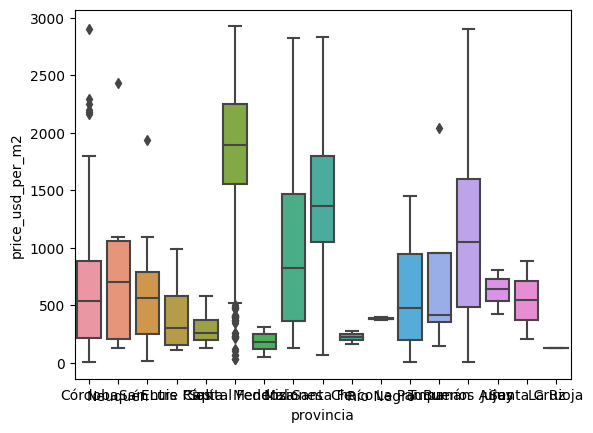

In [ ]:
sns.boxplot(x='provincia',y='price_usd_per_m2', data=data)

11. Agregar un subplot por debajo del anterior que grafique la cantidad de datos en cada provincia

<Axes: xlabel='provincia', ylabel='count'>

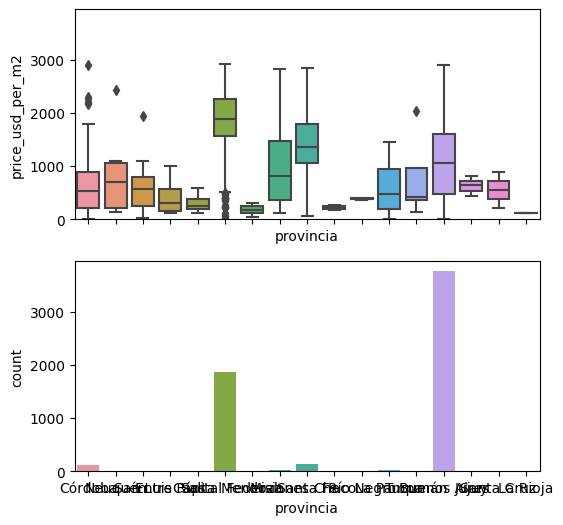

In [ ]:
fig, axs = plt.subplots(2,1, figsize=(6,6),sharex=True, sharey=True)
sns.boxplot(x='provincia',y='price_usd_per_m2', data=data, ax=axs[0])
sns.countplot(x='provincia',data=data, ax=axs[1])

12. Realizar un gráfico que describa la relación entre el precio "price_usd_per_m2", "property_type" y la provincia "provincia"

<Axes: xlabel='provincia', ylabel='price_usd_per_m2'>

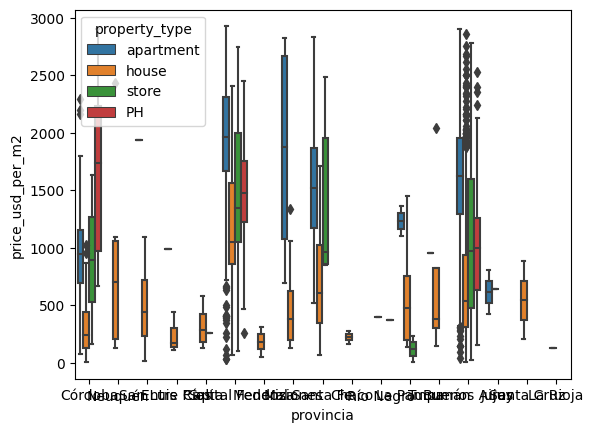

In [ ]:
sns.boxplot(x='provincia',y='price_usd_per_m2', hue='property_type', data=data)

13. Repetir el análisis anterior pero para la superficie de la propiedad "surface_total_in_m2"

<Axes: xlabel='provincia', ylabel='surface_total_in_m2'>

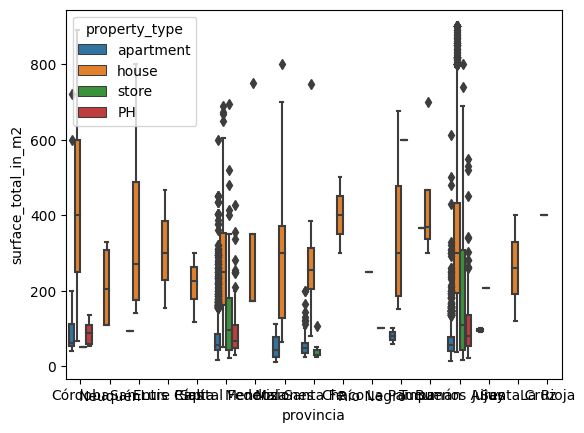

In [ ]:
sns.boxplot(x='provincia',y='surface_total_in_m2', hue='property_type', data=data)

14. Armar un mapa con la localización de todas las propiedades. Utiliza las trasparencias (alpha=) y el tamaño de los marcadores (s=) para se aprecien mejor las zonas con mayor densidad de propiedades.

In [ ]:
states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='10m',
        facecolor='none',edgecolor='gray')

countries = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_0_countries',
        scale='10m',
        facecolor='none',edgecolor='black')


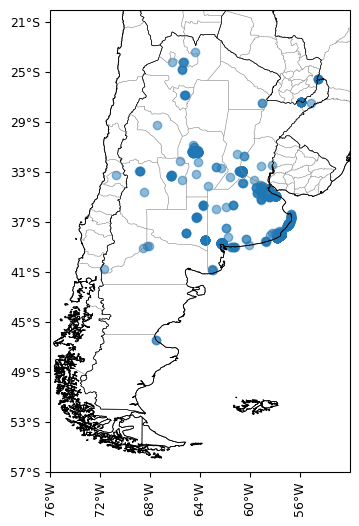

In [ ]:
latsouth=-57
latnorth=-20
lonwest=-76
loneast=-52

fig, axs = plt.subplots(1,1, figsize=(6,6),sharex=True, sharey=True, subplot_kw={'projection': ccrs.PlateCarree()})
axs.set_extent([lonwest, loneast, latsouth, latnorth], crs=ccrs.PlateCarree())
cs=axs.scatter(data.longitud,data.latitud, alpha=0.5)
axs.coastlines(resolution='10m',linewidth=0.6)
axs.add_feature(countries,linewidth=0.4)
axs.add_feature(states_provinces,linewidth=0.4)
axs.set_yticks(np.arange(latsouth,latnorth,4), crs=ccrs.PlateCarree())
axs.set_xticks(np.arange(lonwest,loneast,4), crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
axs.xaxis.set_major_formatter(lon_formatter)
axs.yaxis.set_major_formatter(lat_formatter)
axs.yaxis.set_tick_params(labelsize=9)
axs.xaxis.set_tick_params(rotation=90, labelsize=9)


15. Al mapa anterior, agregarle una gama de colores que indique el precio de la propiedad.

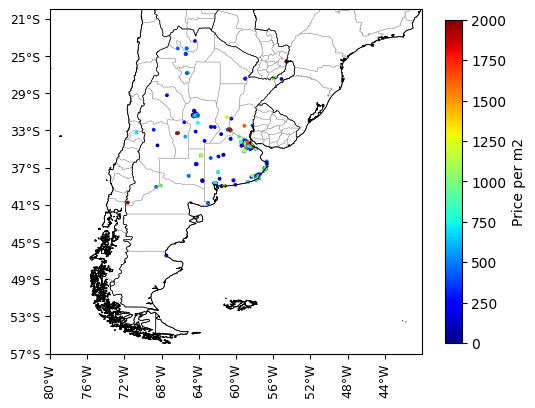

In [ ]:
fig, axs = plt.subplots(1,1, figsize=(6,6),sharex=True, sharey=True, subplot_kw={'projection': ccrs.PlateCarree()})
axs.set_extent([lonwest, loneast, latsouth, latnorth], crs=ccrs.PlateCarree())
cs=axs.scatter(data.longitud,data.latitud,s=3, c=data.price_usd_per_m2,cmap='jet', vmin=0, vmax=2000)
axs.coastlines(resolution='10m',linewidth=0.6)
axs.add_feature(countries,linewidth=0.4)
axs.add_feature(states_provinces,linewidth=0.4)
axs.set_yticks(np.arange(latsouth,latnorth,4), crs=ccrs.PlateCarree())
axs.set_xticks(np.arange(lonwest,loneast,4), crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
axs.xaxis.set_major_formatter(lon_formatter)
axs.yaxis.set_major_formatter(lat_formatter)
axs.yaxis.set_tick_params(labelsize=9)
axs.xaxis.set_tick_params(rotation=90, labelsize=9)
fig.colorbar(cs,orientation='vertical',shrink=0.7, label='Price per m2')

16. Rehacer el mapa anterior en 4 submapas de acuerdo al tipo de propiedad.

In [ ]:
apart=data[data.property_type=='apartment']
house=data[data.property_type=='house']
store=data[data.property_type=='store']
ph=data[data.property_type=='PH']

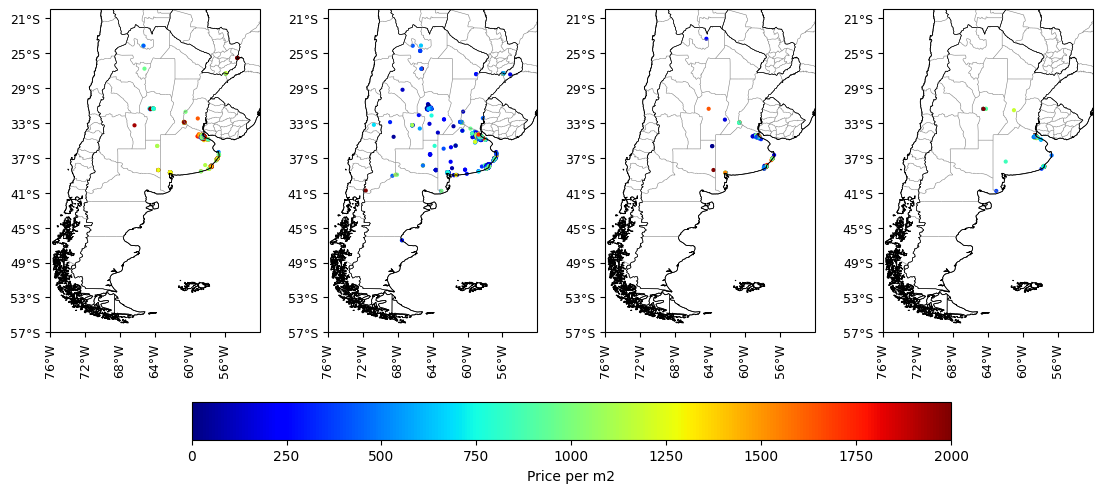

In [ ]:
sets=[apart, house, store, ph]
fig, axs = plt.subplots(1,4, figsize=(14,6),sharex=True, sharey=True, subplot_kw={'projection': ccrs.PlateCarree()})
for i in range(4):
  axs[i].set_extent([lonwest, loneast, latsouth, latnorth], crs=ccrs.PlateCarree())
  cs=axs[i].scatter(sets[i]['longitud'],sets[i]['latitud'],s=4, c=sets[i]['price_usd_per_m2'],cmap='jet', vmin=0, vmax=2000)
  axs[i].coastlines(resolution='10m',linewidth=0.6)
  axs[i].add_feature(countries,linewidth=0.4)
  axs[i].add_feature(states_provinces,linewidth=0.4)
  axs[i].set_yticks(np.arange(latsouth,latnorth,4), crs=ccrs.PlateCarree())
  axs[i].set_xticks(np.arange(lonwest,loneast,4), crs=ccrs.PlateCarree())
  lon_formatter = LongitudeFormatter(zero_direction_label=True)
  lat_formatter = LatitudeFormatter()
  axs[i].xaxis.set_major_formatter(lon_formatter)
  axs[i].yaxis.set_major_formatter(lat_formatter)
  axs[i].yaxis.set_tick_params(labelsize=9)
  axs[i].xaxis.set_tick_params(rotation=90, labelsize=9)
fig.subplots_adjust(wspace=0.1)
fig.colorbar(cs,ax=axs.ravel().tolist(), orientation='horizontal',shrink=0.7, label='Price per m2')

15. Interpolar los precios de las propiedades para crear un campo.

In [ ]:
x=np.arange(-100, 36,0.5) ## crear un array con todos los valores entre la longitud maxima y minima, poner resolución a gusto
y=np.arange(-47, 46,0.5) ## crear un array con todos los valores entre la longitud maxima y minima, poner resolución a gusto

X, Y = np.meshgrid(x,y)

interpolado=griddata((data.longitud, data.latitud), data.price_usd_per_m2, (X, Y), method='linear')

16. Graficar el campo utilizando las funciones contour, contourf o pcolor.

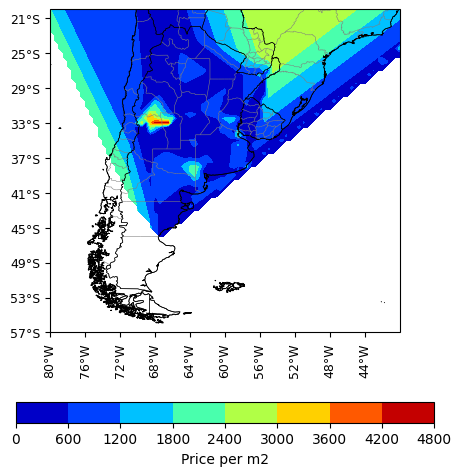

In [ ]:
fig, axs = plt.subplots(1,1, figsize=(6,6),sharex=True, sharey=True, subplot_kw={'projection': ccrs.PlateCarree()})
axs.set_extent([lonwest, loneast, latsouth, latnorth], crs=ccrs.PlateCarree())
cs=axs.contourf(x,y,interpolado,cmap='jet')
axs.coastlines(resolution='10m',linewidth=0.6)
axs.add_feature(countries,linewidth=0.4)
axs.add_feature(states_provinces,linewidth=0.4)
axs.set_yticks(np.arange(latsouth,latnorth,4), crs=ccrs.PlateCarree())
axs.set_xticks(np.arange(lonwest,loneast,4), crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
axs.xaxis.set_major_formatter(lon_formatter)
axs.yaxis.set_major_formatter(lat_formatter)
axs.yaxis.set_tick_params(labelsize=9)
axs.xaxis.set_tick_params(rotation=90, labelsize=9)
fig.colorbar(cs,orientation='horizontal',shrink=0.9, label='Price per m2')

17. Volver a realizar la interpolación con otros métodos (method=) "nearest" y "cubic", ¿cómo cambia el resultado?